In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True
import scipy
from scipy import interpolate
import scipy.integrate as si
import scipy.special as spec

In [2]:
h = 0.7
c =299792.458
rho_crit = 2.77536627e11 #h^2 Msun/Mpc^3
Omega_m = 0.307493988068
Omega_l = 1.-Omega_m

In [3]:
# Load data from Yoon
fname_mh125   = 'a70_HI_group_mh12.5_ngal2.dat'
fname_isolate = 'a70_HI_group_isolate_ngal1.dat'

#Read data
data_mh125=np.genfromtxt(fname_mh125,
                        dtype=(int,float,float,float,float, float,float,float,float, float,float,float,float, \
                               float,float,float,float, float,float,float,float,float,float,float,float),
                        names=('AGCNr','HIra','HIdec','v21','redshift','dist','w50','flux','snratio','loghimass','groupid',\
                         'gra','gdec','gz','Mhalo_L','Mhalo_M','ngal','r180L','d_A_mpc','r180_arcmin','galid','ra','dec',\
                         'z','MASS'))

data_isolate=np.genfromtxt(fname_isolate,
                        dtype=(int,float,float,float,float, float,float,float,float, float,float,float,float, \
                               float,float,float,float, float,float,float,float,float,float,float,float),
                        names=('AGCNr','HIra','HIdec','v21','redshift','dist','w50','flux','snratio','loghimass','groupid',\
                         'gra','gdec','gz','Mhalo_L','Mhalo_M','ngal','r180L','d_A_mpc','r180_arcmin','galid','ra','dec',\
                         'z','MASS'))

In [4]:
# Load my a70 data
mydata = np.genfromtxt('../70/DATA_FULL/data_alpha_70_FULL_DATA_flux_w50.txt',
                     dtype=(float,float,float,float,float,float,float,float),
                     names=('agc','ra','dec','v50','vcmb','logMHI', 'flux', 'w50'))
print len(mydata['logMHI'])

17513


In [5]:
print 'Number of HI sources in the isolated catalog with M_halo>0:', len(data_isolate[np.where(data_isolate['Mhalo_L']>0.)[0]]['loghimass'])
print len(data_isolate[np.where(data_isolate['Mhalo_M']==0.)[0]]['loghimass'])
print len(data_isolate['loghimass'])

print 'Number of HI sources in the group catalog with M_halo>0:', len(data_mh125[np.where(data_mh125['Mhalo_L']>0.)[0]]['loghimass'])
print len(data_mh125[np.where(data_mh125['Mhalo_M']==0.)[0]]['loghimass'])
print len(data_mh125['loghimass'])

print 'Total number of HI sources :',  len(data_isolate[np.where(data_isolate['Mhalo_L']>0.)[0]]['loghimass'])\
                                            +len(data_mh125['loghimass'])

Number of HI sources in the isolated catalog with M_halo>0: 1832
5697
6992
Number of HI sources in the group catalog with M_halo>0: 1437
0
1437
Total number of HI sources : 3269


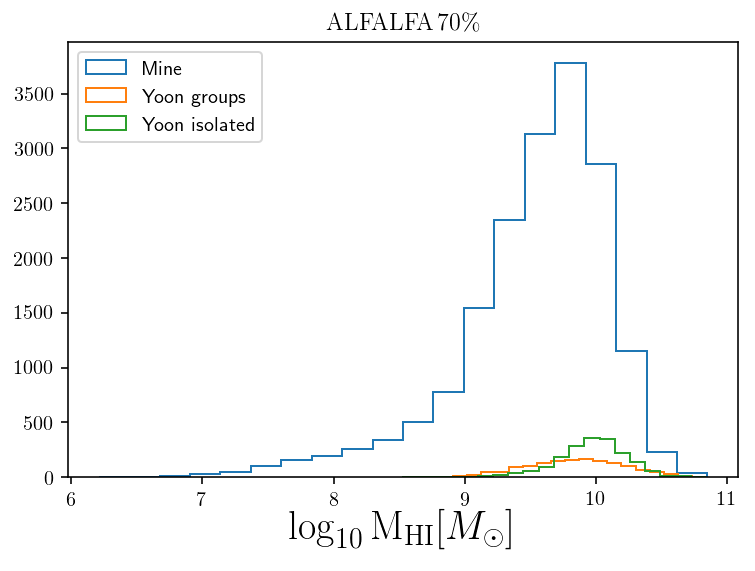

In [6]:
# Histogram of HI masses in both catalogues and in mine a70
plt.hist(mydata['logMHI'], histtype='step', bins=20, label = 'Mine')
plt.hist(data_mh125['loghimass'], histtype='step', bins=20, label = 'Yoon groups')
plt.hist(data_isolate[np.where(data_isolate['Mhalo_L']>0.)[0]]['loghimass'], histtype='step', bins=20, label = 'Yoon isolated')

plt.title('${\\rm ALFALFA\,70\\%}$')
plt.xlabel('$\\log_{10}{\\rm M_{HI}}[M_\\odot]$', fontsize=20)
plt.legend(loc=2)
# plt.savefig('HI_histogram_comp.pdf', bbox_inches='tight')


In [47]:
# Make one single catalogue from groups and isolated catalogues
# + 
# impose cut on v21<15000 due to RFI

# yoon_all = np.concatenate((data_mh125[np.where(data_mh125['Mhalo_L']>9)[0]],data_isolate[np.where(data_isolate['Mhalo_L']>9)[0]]))
yoon_all = np.concatenate((data_mh125[np.where((data_mh125['Mhalo_L']>9) & (data_mh125['v21']<15000.))[0]],\
                                data_isolate[np.where((data_isolate['Mhalo_L']>9) & (data_isolate['v21']<15000.))[0]]))

print len(yoon_all)

3088


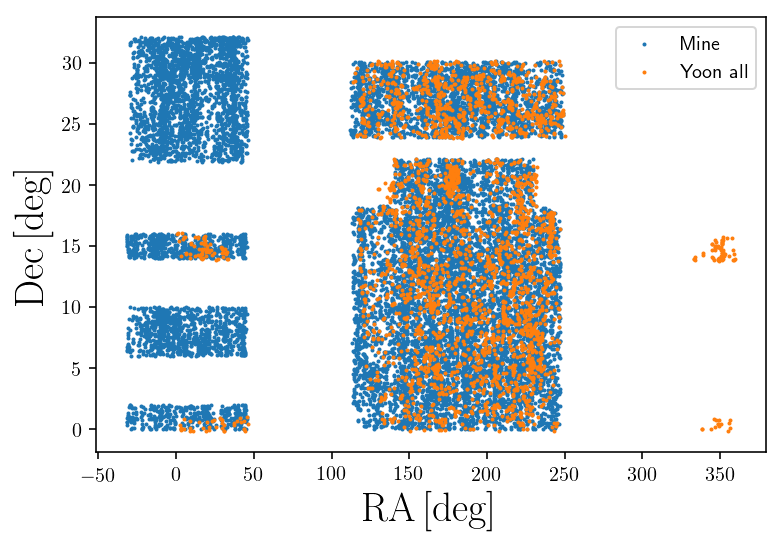

In [48]:
# Check the sky coverage of
plt.scatter(mydata['ra'], mydata['dec'], s=1, label = 'Mine')
plt.scatter(yoon_all['HIra'], yoon_all['HIdec'], s=1, label = 'Yoon all')
plt.legend(loc=0)
plt.xlabel('${\\rm RA\,[deg]}$', fontsize=20)
plt.ylabel('${\\rm Dec\,[deg]}$', fontsize=20)

Range of halo masses in log10(M_h[M_\odot/h]):  11.6839 15.0375


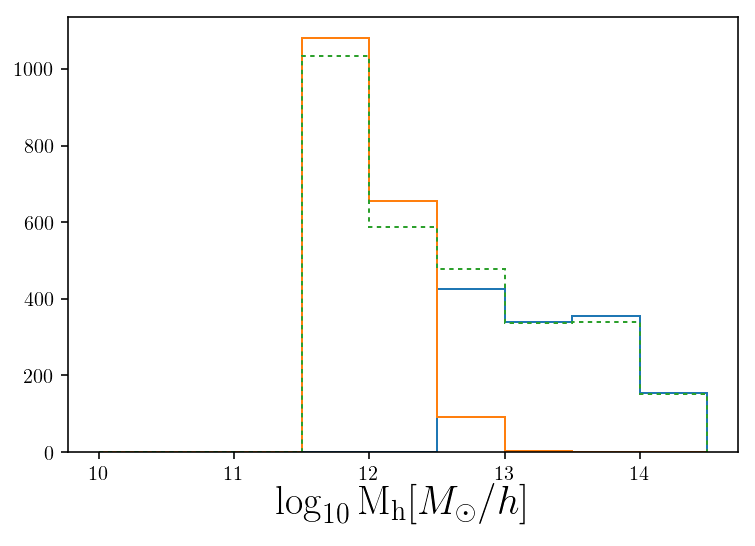

In [51]:
# Histogram of halo masses
plt.hist(data_mh125['Mhalo_L'], bins=np.arange(10,15,0.5), histtype='step')
plt.hist(data_isolate['Mhalo_L'], bins=np.arange(10,15,0.5), histtype='step')
plt.hist(yoon_all['Mhalo_L'], bins=np.arange(10,15,0.5), histtype='step', linestyle='dotted')
plt.xlabel('$\\log_{10}{\\rm M_h}[M_\\odot/h]$', fontsize=20)
print 'Range of halo masses in log10(M_h[M_\odot/h]): ', np.min(yoon_all['Mhalo_L']), np.max(yoon_all['Mhalo_L'])

In [52]:
print 'fsky of a70: ', 4529./(4.*np.pi*(180./np.pi)**2)

print 'fsky of Yoon all (estimated): ', 3612./(4.*np.pi*(180./np.pi)**2)

fsky = 3612./(4.*np.pi*(180./np.pi)**2)

fsky of a70:  0.109786058087
fsky of Yoon all (estimated):  0.0875573508084


-2000.2 17912.4
701.056886515 14998.1883027
374.0 15276.0


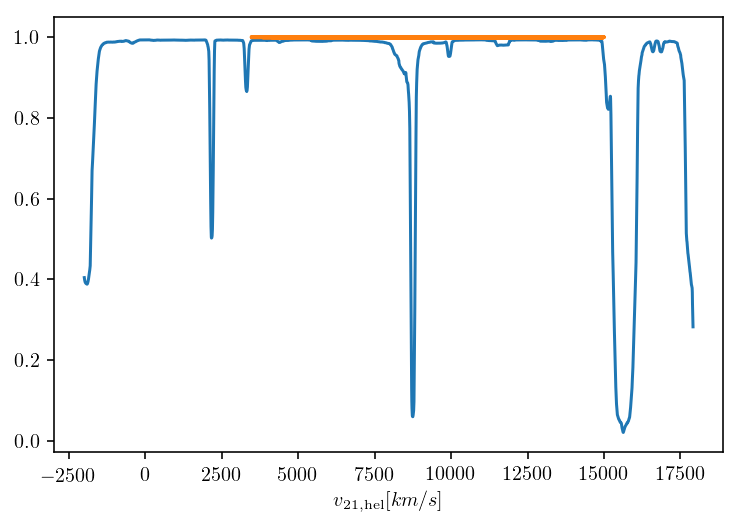

In [80]:
# RFI completeness table and interpolation
vhrfi,complrfi = np.loadtxt('../70/rfi_completeness.txt',unpack=True, delimiter=',')
plt.plot(vhrfi,complrfi)
int_complete = scipy.interpolate.interp1d(vhrfi, complrfi, kind='linear')
# plt.plot(np.arange(0,15000,0.1),int_complete(np.arange(0,15000,0.1)))
print vhrfi.min(), vhrfi.max()
# plt.plot(mydata['vcmb'], np.ones_like(mydata['v50'])-0.01)
# plt.plot(mydata['v50'], np.ones_like(mydata['v50'])+0.01)
plt.plot(yoon_all['v21'], np.ones_like(yoon_all['v21']), linewidth=2)
# plt.plot(yoon_all_zcut['v21'], np.ones_like(yoon_all_zcut['v21'])+0.05)
plt.xlabel('$v_{21,\\rm hel}[km/s]$')
print np.min(mydata['vcmb']), np.max(mydata['vcmb']) 
print np.min(mydata['v50']), np.max(mydata['v50']) 

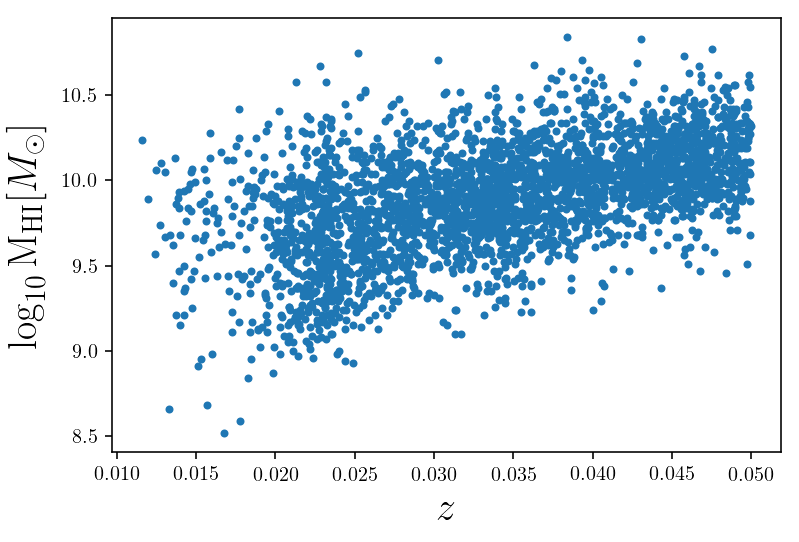

In [55]:
plt.plot(yoon_all['redshift'], yoon_all['loghimass'], '.')
plt.xlabel('$z$', fontsize=20)
plt.ylabel('$\\log_{10}{\\rm M_{HI}}[M_\\odot]$', fontsize=20)

In [56]:
# HI massses of a particluar cluster:
print yoon_all[np.where(yoon_all['groupid']==1)]['loghimass']

[  9.48  10.19   8.93   9.14   9.53   9.39   9.65   9.98   9.64   9.32
   9.4    9.1    9.08   9.45   9.13   9.29   9.15   8.59   9.28   8.96
   8.94]


15.0375
114.4
0.0257833333333


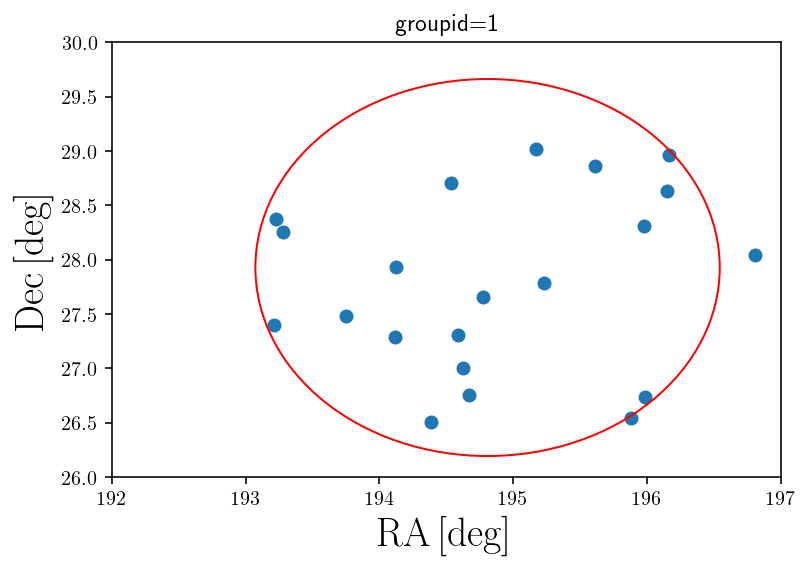

In [57]:
import matplotlib.pyplot as pyplt
circle1 = pyplt.Circle((yoon_all[np.where(yoon_all['groupid']==1)]['gra'][0], \
                       yoon_all[np.where(yoon_all['groupid']==1)]['gdec'][0]), yoon_all[np.where(yoon_all['groupid']==1)[0]]['r180L'][0]\
                       /yoon_all[np.where(yoon_all['groupid']==1)[0]]['dist'][0]\
                       *180./np.pi, color='r', fill=False)
fig, ax = plt.subplots() 
ax.scatter(yoon_all[np.where(yoon_all['groupid']==1)]['HIra'],yoon_all[np.where(yoon_all['groupid']==1)]['HIdec'])
ax.add_artist(circle1)
ax.set_ylim(26,30)
ax.set_xlim(192,197)
print yoon_all[np.where(yoon_all['groupid']==1)]['Mhalo_L'][0]
print yoon_all[np.where(yoon_all['groupid']==1)[0]]['dist'][0]
print yoon_all[np.where(yoon_all['groupid']==1)[0]]['redshift'][0]
ax.set_title('groupid=1')
ax.set_xlabel('${\\rm RA\,[deg]}$', fontsize=20)
ax.set_ylabel('${\\rm Dec\,[deg]}$', fontsize=20)

14.91
161.5
0.03736


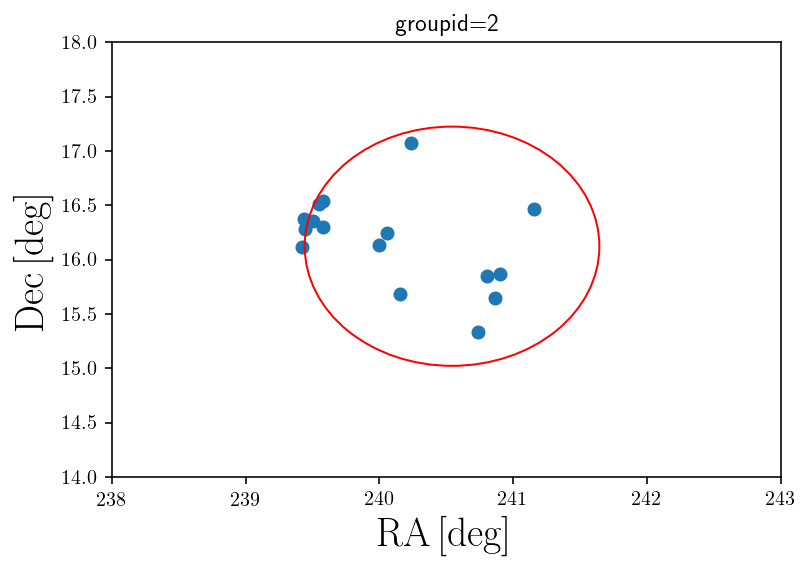

In [58]:
circle1 = pyplt.Circle((yoon_all[np.where(yoon_all['groupid']==2)]['gra'][0], \
                       yoon_all[np.where(yoon_all['groupid']==2)]['gdec'][0]), \
                       yoon_all[np.where(yoon_all['groupid']==2)[0]]['r180L'][0]\
                       /yoon_all[np.where(yoon_all['groupid']==2)[0]]['dist'][0]\
                       *180./np.pi, color='r', fill=False)
fig, ax = plt.subplots() 
ax.scatter(yoon_all[np.where(yoon_all['groupid']==2)]['HIra'],yoon_all[np.where(yoon_all['groupid']==2)]['HIdec'])
ax.add_artist(circle1)
ax.set_ylim(14,18)
ax.set_xlim(238,243)
print yoon_all[np.where(yoon_all['groupid']==2)]['Mhalo_L'][0]
print yoon_all[np.where(yoon_all['groupid']==2)[0]]['dist'][0]
print yoon_all[np.where(yoon_all['groupid']==2)[0]]['redshift'][0]
ax.set_title('groupid=2')
ax.set_xlabel('${\\rm RA\,[deg]}$', fontsize=20)
ax.set_ylabel('${\\rm Dec\,[deg]}$', fontsize=20)

[ 11.5  12.1  12.7  13.3  13.9  14.5  15.1] 7
[ 11.8  12.4  13.   13.6  14.2  14.8] 6
[  6.30957344e+11   2.51188643e+12   1.00000000e+13   3.98107171e+13
   1.58489319e+14   6.30957344e+14]
[  8.52   8.62   8.72   8.82   8.92   9.02   9.12   9.22   9.32   9.42
   9.52   9.62   9.72   9.82   9.92  10.02  10.12  10.22  10.32  10.42
  10.52  10.62  10.72  10.82]
[  8.57   8.67   8.77   8.87   8.97   9.07   9.17   9.27   9.37   9.47
   9.57   9.67   9.77   9.87   9.97  10.07  10.17  10.27  10.37  10.47
  10.57  10.67  10.77]
8.52


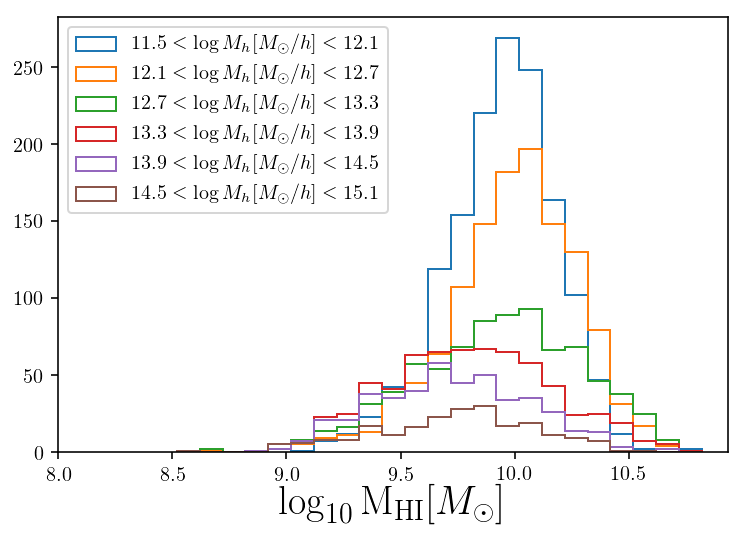

In [223]:
halo_bins = np.arange(11.5,15.6,0.6)
print halo_bins, len(halo_bins)
halo_bins_c = 0.5*(halo_bins[1:]+halo_bins[:-1]) 
print halo_bins_c, len(halo_bins_c)
print 10**halo_bins_c

HI_bins = np.arange(np.min(yoon_all['loghimass']), np.max(yoon_all['loghimass']),0.1)
print HI_bins

HI_bins_c = 0.5*(HI_bins[1:]+HI_bins[:-1]) 
print HI_bins_c

for ih, hi in enumerate(halo_bins_c):
    plt.hist(yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[ih]-0.5))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[ih]+0.5)))]['loghimass'], \
                         bins=HI_bins, histtype='step', \
                         label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[ih], halo_bins[ih+1]))
plt.xlim(8)
plt.legend(loc=2)
plt.xlabel('$\\log_{10}{\\rm M_{HI}}[M_\\odot]$', fontsize=20)
print yoon_all['loghimass'].min()

In [224]:
yoon_all_1 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[0]-0.5))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[0]+0.5)))]
yoon_all_2 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[1]-0.5))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[1]+0.5)))]
yoon_all_3 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[2]-0.5))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[2]+0.5)))]
yoon_all_4 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[3]-0.5))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[3]+0.5)))]
yoon_all_5 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[4]-0.5))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[4]+0.5)))]
yoon_all_6 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[5]-0.5))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[5]+0.5)))]
# plt.hist(yoon_all_1['loghimass'], bins=HI_bins, histtype='step')

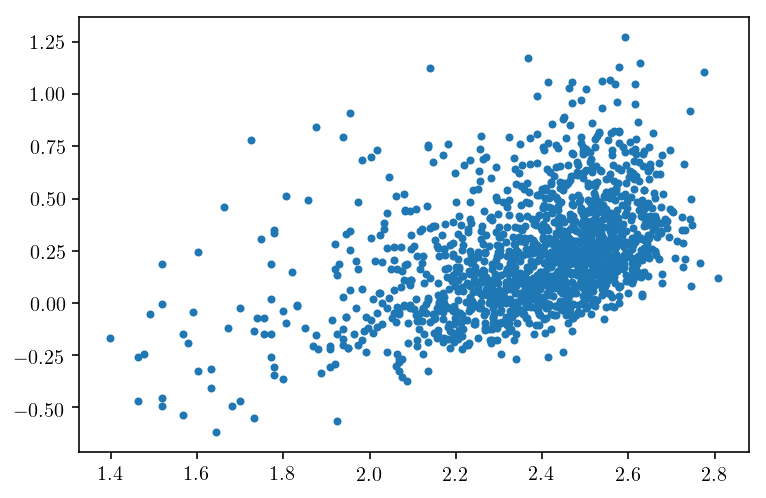

In [225]:
plt.plot(np.log10(yoon_all_1['w50']), np.log10(yoon_all_1['flux']), '.')

In [226]:
def log_HIMF_halo_bin(yoon):
    Distances_25 = np.zeros_like(yoon['loghimass'])
    Distances_real = np.zeros_like(Distances_25)
    for im, mi in enumerate(yoon['loghimass']):
#         if yoon['w50'][im]<2.5:
#             Distances_25[im] = np.sqrt(10**mi/(2.356e5*(yoon['w50'][im]**0.5/10**(1.14+0.102))))
#         else:
#             Distances_25[im] = np.sqrt(10**mi/(2.356e5*(yoon['w50'][im]/10**(2.39+0.102))))
#         Distances_real[im]   = np.sqrt(10**mi/(2.356e5*yoon['flux'][im]))

        # since there are Code2 objects too, we use 6 & 7 eq. from Haynes+2011
        if yoon['w50'][im]<2.5:
            Distances_25[im] = np.sqrt(10**mi/(2.356e5*(yoon['w50'][im]**0.5/10**(1.11+0.130))))
        else:
            Distances_25[im] = np.sqrt(10**mi/(2.356e5*(yoon['w50'][im]/10**(2.36+0.130))))
        Distances_real[im]   = np.sqrt(10**mi/(2.356e5*yoon['flux'][im]))
        
    
    Volumes_25   = fsky*4.*np.pi/3.*Distances_25**3
    Volumes_real = fsky*4.*np.pi/3.*Distances_real**3*int_complete(yoon['v21'])
    Volumes_25_rfi = Volumes_25*int_complete(yoon['v21'])
    
#     plt.plot(yoon['loghimass'],Volumes_real/Volumes_25_rfi, '.')
    print np.mean(Volumes_real/Volumes_25_rfi)
    
    Phi_25 = np.zeros_like(HI_bins_c)
    Phi_rfi_25 = np.zeros_like(HI_bins_c)
    dPhi_25 = np.zeros_like(HI_bins_c)
    dPhi_rfi_25 = np.zeros_like(HI_bins_c)
    
    nums_00, bins_00 = np.histogram(yoon['loghimass'], bins=HI_bins)
    
    for ib, bi in enumerate(HI_bins_c):
        Phi_25[ib] = np.sum(1./Volumes_25[np.where((yoon['loghimass']>bi-0.1)&(yoon['loghimass']<bi+0.1))[0]])
        dPhi_25[ib] = np.sum(1./Volumes_25[np.where((yoon['loghimass']>bi-0.1)&(yoon['loghimass']<bi+0.1))[0]])/np.sqrt(nums_00[ib])
        Phi_rfi_25[ib] = np.sum(1./Volumes_25_rfi[np.where((yoon['loghimass']>bi-0.1)&(yoon['loghimass']<bi+0.1))[0]])
        dPhi_rfi_25[ib] = np.sum(1./ Volumes_25_rfi[np.where((yoon['loghimass']>bi-0.1)&(yoon['loghimass']<bi+0.1))[0]])/np.sqrt(nums_00[ib])
    return [HI_bins_c[Phi_rfi_25>0], np.log10(Phi_rfi_25[Phi_rfi_25>0]/np.diff(HI_bins_c)[0]), dPhi_rfi_25[Phi_rfi_25>0]/Phi_rfi_25[Phi_rfi_25>0]]

print log_HIMF_halo_bin(yoon_all_2)

0.409372100781
[array([  8.67,   8.77,   8.87,   8.97,   9.07,   9.17,   9.27,   9.37,
         9.47,   9.57,   9.67,   9.77,   9.87,   9.97,  10.07,  10.17,
        10.27,  10.37,  10.47,  10.57,  10.67,  10.77]), array([-5.16081328, -4.54632051, -3.84600971, -3.60089548, -3.57845185,
       -3.51453659, -3.44631638, -3.28153918, -3.2020119 , -3.0886297 ,
       -2.99239922, -2.92903673, -2.9009543 , -2.88884548, -2.84914741,
       -3.02720584, -3.3932991 , -3.68063876, -4.16920996, -4.6289658 ,
       -5.2705198 , -5.55249224]), array([ 1.        ,         inf,  1.        ,  0.4472136 ,  0.4472136 ,
        0.33333333,  0.30151134,  0.2773501 ,  0.16903085,  0.1490712 ,
        0.125     ,  0.09667365,  0.08219949,  0.07412493,  0.07124705,
        0.08219949,  0.0877058 ,  0.11250879,  0.1796053 ,  0.24253563,
        0.5       ,  1.        ])]


/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars
/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars


0.416457151922
0.416457151922
0.409372100781
0.409372100781
0.413320821804
0.413320821804
0.422273436849
0.422273436849
0.417284768416
0.417284768416
0.46326780495
0.46326780495


/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars
/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars


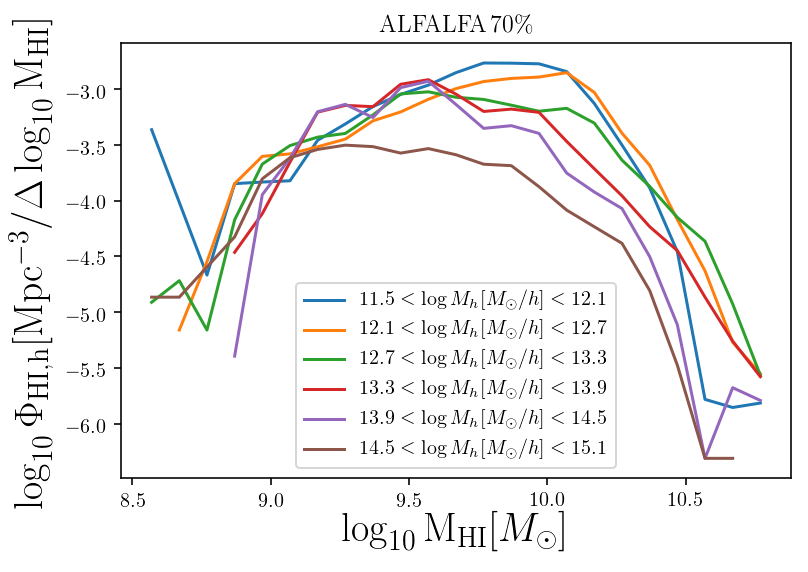

In [227]:
plt.plot(log_HIMF_halo_bin(yoon_all_1)[0],log_HIMF_halo_bin(yoon_all_1)[1], label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[0], halo_bins[1]))
plt.plot(log_HIMF_halo_bin(yoon_all_2)[0],log_HIMF_halo_bin(yoon_all_2)[1], label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[1], halo_bins[2]))
plt.plot(log_HIMF_halo_bin(yoon_all_3)[0],log_HIMF_halo_bin(yoon_all_3)[1], label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[2], halo_bins[3]))
plt.plot(log_HIMF_halo_bin(yoon_all_4)[0],log_HIMF_halo_bin(yoon_all_4)[1], label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[3], halo_bins[4]))
plt.plot(log_HIMF_halo_bin(yoon_all_5)[0],log_HIMF_halo_bin(yoon_all_5)[1], label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[4], halo_bins[5]))
plt.plot(log_HIMF_halo_bin(yoon_all_6)[0],log_HIMF_halo_bin(yoon_all_6)[1], label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[5], halo_bins[6]))

plt.xlabel('$\\log_{10}{\\rm M_{HI}}[M_\\odot]$', fontsize=20)
plt.ylabel('$\\log_{10}\\Phi_{\\rm HI,h}[{\\rm Mpc^{-3}}/\\Delta \\log_{10}{\\rm M_{HI}}]$', fontsize=20)
plt.title('${\\rm ALFALFA\,70\\%}$')
plt.legend(loc=0)
# plt.errorbar(log_HIMF_halo_bin(yoon_all_1)[0],log_HIMF_halo_bin(yoon_all_1)[1], yerr=log_HIMF_halo_bin(yoon_all_1)[2])
# plt.errorbar(log_HIMF_halo_bin(yoon_all_2)[0],log_HIMF_halo_bin(yoon_all_2)[1], yerr=log_HIMF_halo_bin(yoon_all_2)[2])

In [228]:
MHI_arr = np.zeros_like(halo_bins_c)

MHI_arr[0] = np.sum(10**(log_HIMF_halo_bin(yoon_all_1)[1])*10**(log_HIMF_halo_bin(yoon_all_1)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_1['r180L'])**3/h**3
    
MHI_arr[1] = np.sum(10**(log_HIMF_halo_bin(yoon_all_2)[1])*10**(log_HIMF_halo_bin(yoon_all_2)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_2['r180L'])**3/h**3
    
MHI_arr[2] = np.sum(10**(log_HIMF_halo_bin(yoon_all_3)[1])*10**(log_HIMF_halo_bin(yoon_all_3)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_3['r180L'])**3/h**3
    
MHI_arr[3] = np.sum(10**(log_HIMF_halo_bin(yoon_all_4)[1])*10**(log_HIMF_halo_bin(yoon_all_4)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_4['r180L'])**3/h**3
    
MHI_arr[4] = np.sum(10**(log_HIMF_halo_bin(yoon_all_5)[1])*10**(log_HIMF_halo_bin(yoon_all_5)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_5['r180L'])**3/h**3
    
MHI_arr[5] = np.sum(10**(log_HIMF_halo_bin(yoon_all_6)[1])*10**(log_HIMF_halo_bin(yoon_all_6)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_6['r180L'])**3/h**3
    
print MHI_arr

0.416457151922
0.416457151922
0.409372100781
0.409372100781
0.413320821804
0.413320821804
0.422273436849
0.422273436849
0.417284768416
0.417284768416
0.46326780495
0.46326780495
[  3.59508004e+07   8.54403723e+07   2.39102315e+08   8.01966074e+08
   1.92467779e+09   2.82496659e+09]


/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars
/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars


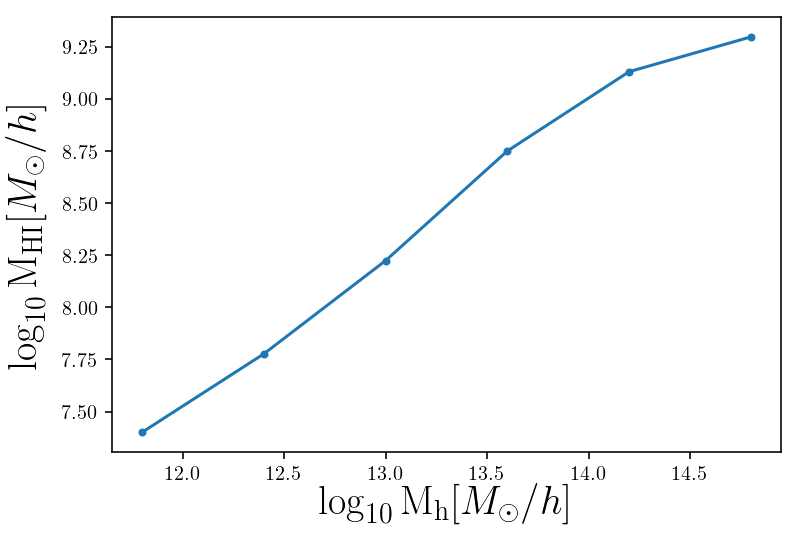

In [229]:
plt.plot(halo_bins_c, np.log10(MHI_arr*h), '.-')
plt.xlabel('$\\log_{10}{\\rm M_h}[M_\\odot/h]$', fontsize=20)
plt.ylabel('$\\log_{10}{\\rm M_{HI}}[M_\\odot/h]$', fontsize=20)

In [ ]:
# plt.hist(Distances_25_1, bins=np.arange(0,500,10), histtype='step')
# plt.hist(Distances_real_1, bins=np.arange(0,500,10), histtype='step')

In [ ]:
# print np.sum(10**yoon_all['loghimass'])
# print np.sum(10**yoon_all_1['loghimass'])
# print np.sum(10**mydata['logMHI'])

In [ ]:
# yoon_all = np.concatenate((data_mh125,data_isolate))


# print len(set(yoon_all['groupid']))
# print set(yoon_all['groupid'])

# for igr, gri in enumerate(set(yoon_all['groupid'])):
#     print len(yoon_all[np.where(yoon_all['groupid']==gri)[0]]['loghimass'])
# print len(yoon_all[np.where(yoon_all['groupid']==set(yoon_all['groupid']))[0]]['loghimass'])


# print len(data_mh125['Mhalo_L']), len(data_mh125[np.where(data_mh125['Mhalo_L']>0.1)[0]])
# print len(data_isolate['Mhalo_L']), len(data_isolate[np.where(data_isolate['Mhalo_L']>0.1)[0]])
# print len(data_mh125['Mhalo_L'])+len(data_isolate[np.where(data_isolate['Mhalo_L']>0.1)[0]])

# print len(yoon_all['Mhalo_L']), len(yoon_all_['Mhalo_L'])
# # print len(data_isolate['Mhalo_L']), len(data_mh125['Mhalo_L'])
# # print len(data_mh125[np.where(data_mh125['Mhalo_L']<10)])
# # print len(data_isolate[np.where(data_isolate['Mhalo_M']<1)])

In [ ]:
# bla = set(yoon_all['r180L'])
# bla2 = set(data_mh125['r180L'])

# nums_r180, bins_r180 = np.histogram(list(bla))
# nums_r180_2, bins_r180_2 = np.histogram(list(bla2))

# # plt.hist(yoon_all['r180L'])
# print nums_r180.sum()
# print nums_r180_2.sum()

In [ ]:
# print yoon_all['groupid'][:100]
# print np.max(yoon_all['groupid'])

In [ ]:
# print np.mean(yoon_all_1['r180L']), np.mean(yoon_all_2['r180L']), np.mean(yoon_all_3['r180L']), \
#         np.mean(yoon_all_4['r180L']), np.mean(yoon_all_5['r180L']), np.mean(yoon_all_6['r180L']), \
#             np.mean(yoon_all_7['r180L'])
